# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

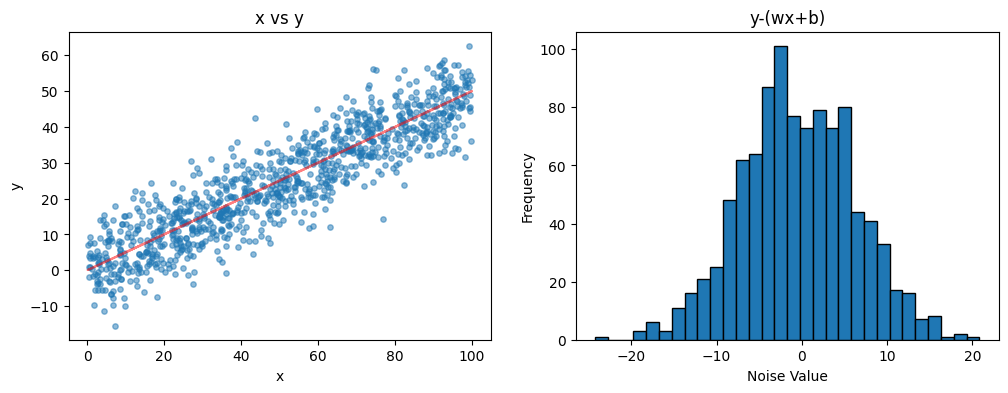

In [26]:
import numpy as np
import matplotlib.pyplot as plt
'''
We need to generate 1000 randomized pairs of coordinates (x,y) along a line specified by y=wx+b. 
Because x & y must be approximately linearly dependant, there needs to be noise in the relationship.
So the relationship is y=wx+b+noise.
Because x is random over an interval it should be uniformly distributed.
y-(wx+b) = noise
So the noise should be normally distributed.
'''

num_samples = 1000
w = .5
b = 0

x = np.random.uniform(0,100,num_samples) # Make a list of x values

std_dev = 7 # How strong is the relationship of x to y?
noise = np.random.normal(0,std_dev,num_samples) # Make a list of normally distributed noise values 
y = w*x + b + noise # Define y 

data = [(x[i],y[i]) for i in range(num_samples)] # loop over x & y lists making tuple ordered pairs

# Plot 𝑥 vs 𝑦 and histogram 𝑦−(𝑤𝑥+𝑏).
fig, axs = plt.subplots(1,2,figsize=(12, 4))

x_vals = [X[0] for X in data]
y_vals = [Y[1] for Y in data]

axs[0].plot(x_vals, w * np.array(x_vals), color='red', alpha=.5)
axs[0].scatter(x_vals,y_vals, s=15,alpha=.5)
axs[0].set_title("x vs y")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].hist(noise, bins=30, edgecolor='black')
axs[1].set_title("y-(wx+b)")
axs[1].set_xlabel("Noise Value")
axs[1].set_ylabel("Frequency")

plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [ ]:
def model_loop(x,w,b):
    
    
    
def model_np(x,w,b):
    

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

7. Plot the cost and parameters versus iteration of gradient descent.